In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = [[58, 60], [62, 60], [60, 58], [64, 60], [67, 70], [70, 72]]
df=pd.DataFrame(data, columns=["mother_height", "daughter_height"])
df.to_csv("height_data.csv", index=False)
df

,mother_height,daughter_height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [25]:
1/(1 + np.exp(-1*(df["daughter_height"].values)))

array([1., 1., 1., 1., 1., 1.])

In [143]:
n = len(df)
b0 = 0
b1 = 0
l = 0.0001
E = 0
iteration_error = []
epochs = 4

In [144]:
for i in range(epochs):
    for j in range(n):
        x=df["mother_height"][j]
        y=df["daughter_height"][j]
        predicted = b0 + b1*x
        E = predicted-y
        iteration_error.append(E)
        b0 = b0-l*E*1
        b1 = b1-l*E*x
        
print(f"b0: {b0}")
print(f"b1: {b1}")
print(f"Error: {E}")

b0: 0.016406249586034958
b1: 1.0149205396744159
Error: -1.8418434461754032


In [145]:
y_pred = np.array(b0 + b1*(df["mother_height"].values))
predicted_df = pd.DataFrame({'X': df["mother_height"], 'y': df["daughter_height"], 'predicted_y': y_pred})
predicted_df

,X,y,predicted_y
0,58,60,58.881798
1,62,60,62.941480
2,60,58,60.911639
3,64,60,64.971321
4,67,70,68.016082
5,70,72,71.060844


In [146]:
error = np.array(y_pred-df["daughter_height"])
MSE = np.sum(error)**2/n
RMSE = (np.sum(error**2)/n)**0.5
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

MSE: 7.668550303986991
RMSE: 2.8258418347410132


## Error through iterations:

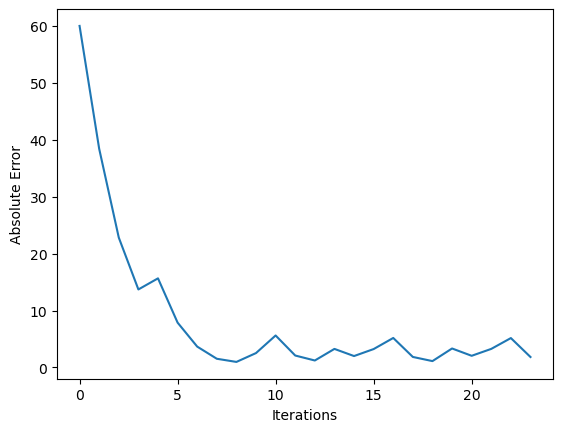

In [157]:
x_axis = np.arange(24)
y_axis = abs(np.array(iteration_error))
plt.plot(x_axis, y_axis)
plt.xlabel("Iterations")
plt.ylabel("Absolute Error")
plt.show()

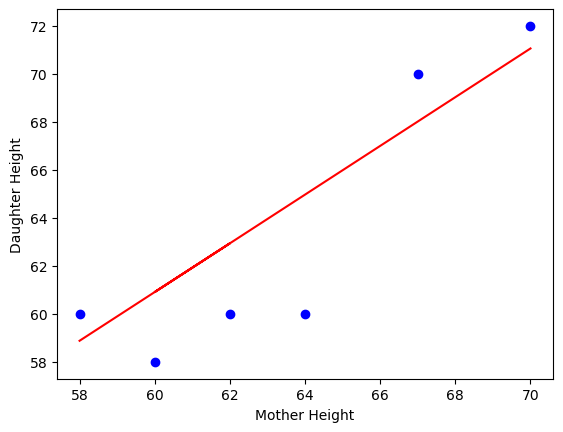

In [160]:
plt.scatter(df["mother_height"], df["daughter_height"], color="blue")
plt.plot(df["mother_height"], y_pred, color="red")
plt.xlabel("Mother Height")
plt.ylabel("Daughter Height")
plt.show()

## Prediction

In [169]:
mother_height=63
daughter_height = b0 + b1*mother_height
pred_h = pd.DataFrame({'Mother': mother_height, 'Daughter': daughter_height}, index=[0])
pred_h

,Mother,Daughter
0,63,63.9564
